## PRACTICE 9 

### EXERCISE 1 

In [1]:
from sympy import dsolve, Eq, symbols, Function, nonlinsolve, solve, diff, lambdify, log, sqrt, hessian, Matrix
from sympy.plotting import plot
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint


#getting the fixed points in terms of the variables

x = symbols('x')
y = symbols('y')
r = symbols('r')
difx = r - x**2
dify = -y
fix_p = nonlinsolve([difx, dify], [x, y])
print(fix_p)
print('\n', 'no fps for non positive r')


{(-sqrt(r), 0), (sqrt(r), 0)}

 no fps for non positive r


for r<0
No real fixed points
No real fixed points


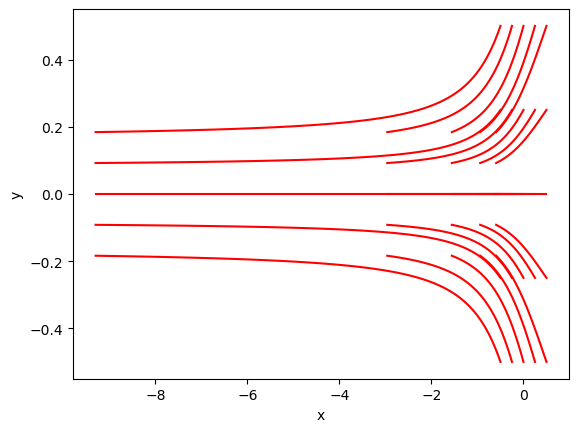

In [2]:
print('for r<0')
r1 = -1
fix_p1 = fix_p.subs({r: r1})
difx1 = diff(difx, x, 1)
difx2 = diff(difx, y, 1)
dify1 = diff(dify, x, 1)
dify2 = diff(dify, y, 1)
a = Matrix([[difx1, difx2], [dify1, dify2]])
#analizing the jacobian for the different fixed points
for e in fix_p1:
    list(e)
    if e[0].is_real and e[1].is_real:
        values_a = []
        print('-------', e, ' fixed point: --------')
        a_new = a.subs({x: e[0], y: e[1]})

        for i in a_new:
            values_a.append(i)

        e, b, c, d = values_a[0], values_a[1], values_a[2], values_a[3]
        J = np.matrix([[e,b],[c,d]]).astype('float64')
        dJ = np.linalg.det(J)
        tJ = np.trace(J)
        k = tJ**2 - 4*dJ
        epsFIX = 1e-6

        if dJ < -epsFIX:
            print(' Unstable Saddle Point')
        elif np.abs(dJ) < epsFIX:
            print('Multiple fixed points')
            if tJ > epsFIX:
                stb = 'unstable'
            elif tJ < -epsFIX:
                stb = 'stable'
            else:
                print('The whole plane is a fixed point')
        else:
            if np.abs(tJ) < epsFIX:
                print('Center')

            else:
                if tJ > epsFIX:
                    stb = 'unstable'
                else:
                    stb = 'stable'
                if k < -epsFIX:
                    print('spiral ' + stb)
                elif np.abs(k) < epsFIX:
                    print('star, degenerate node ' + stb)
                else:
                    print('Node ' + stb)
        print(dJ, tJ, k)
        w, v =  np.linalg.eig(J)
        print('eigenvalues', w)
        if (w[0].real and w[1].real) != 0:
            print('hyperbolic node')
        else:
            print('non-hyperbolic node')
        print('eigenvectors', v)
    else:
        print('No real fixed points')




def model(X, t):
    return np.array([-1 - X[0]**2,
                    - X[1]])

ts = np.linspace(0, 1, 100)
ic = np.linspace(-0.5, 0.5, 5)

for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-')


plt.ylabel('y')
plt.xlabel('x')
plt.show()


r = 0
------- (0, 0)  fixed point: --------
Multiple fixed points
0.0 -1.0 1.0
eigenvalues [ 0. -1.]
non-hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]


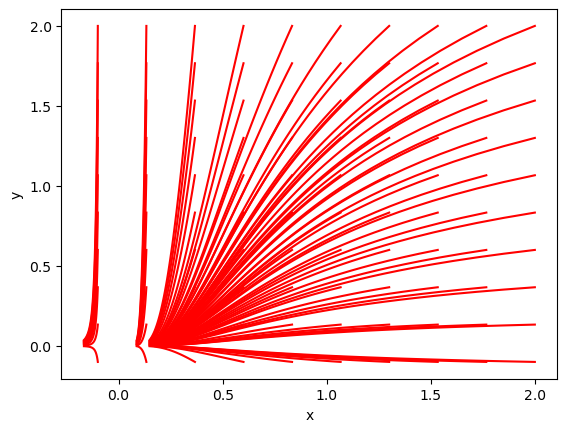

In [3]:
print('r = 0')
difx1 = diff(difx, x, 1)
difx2 = diff(difx, y, 1)
dify1 = diff(dify, x, 1)
dify2 = diff(dify, y, 1)
a = Matrix([[difx1, difx2], [dify1, dify2]])

fix_p2 = {(0,0)}
for e in fix_p2:
    values_a = []
    print('-------', e, ' fixed point: --------')
    a_new = a.subs({x: e[0], y: e[1]})

    for i in a_new:
        values_a.append(i)

    e, b, c, d = values_a[0], values_a[1], values_a[2], values_a[3]
    J = np.matrix([[e,b],[c,d]]).astype('float64')
    dJ = np.linalg.det(J)
    tJ = np.trace(J)
    k = tJ**2 - 4*dJ
    epsFIX = 1e-6

    if dJ < -epsFIX:
        print(' Unstable Saddle Point')
    elif np.abs(dJ) < epsFIX:
        print('Multiple fixed points')
        if tJ > epsFIX:
            stb = 'unstable'
        elif tJ < -epsFIX:
            stb = 'stable'
        else:
            print('The whole plane is a fixed point')
    else:
        if np.abs(tJ) < epsFIX:
            print('Center')

        else:
            if tJ > epsFIX:
                stb = 'unstable'
            else:
                stb = 'stable'
            if k < -epsFIX:
                print('spiral ' + stb)
            elif np.abs(k) < epsFIX:
                print('star, degenerate node ' + stb)
            else:
                print('Node ' + stb)
    print(dJ, tJ, k)
    w, v =  np.linalg.eig(J)
    print('eigenvalues', w)
    if (w[0].real and w[1].real) != 0:
        print('hyperbolic node')
    else:
        print('non-hyperbolic node')
    print('eigenvectors', v)



def model(X, t):
    return np.array([- X[0]**2,
                    - X[1]])

ts = np.linspace(0, 4, 100)
ic = np.linspace(-0.1, 2, 10)

for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-')


plt.ylabel('y')
plt.xlabel('x')
plt.show()


fixed points and phase portrait for r>0, e.g. r = 1
------- (-1, 0)  fixed point: --------
 Unstable Saddle Point
-2.0 1.0 9.0
eigenvalues [ 2. -1.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]
------- (1, 0)  fixed point: --------
Node stable
2.0 -3.0 1.0
eigenvalues [-2. -1.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]


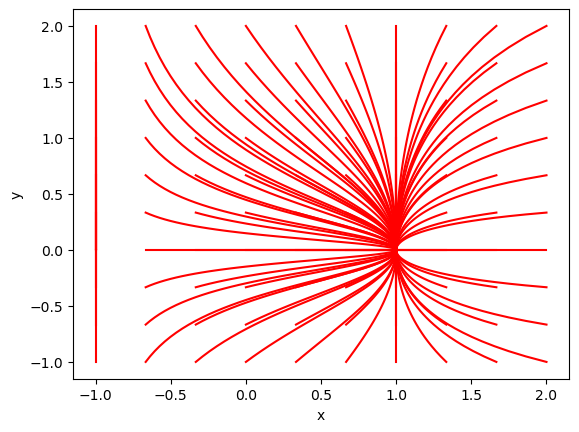

In [4]:
print('fixed points and phase portrait for r>0, e.g. r = 1')
r3 = 1
r = symbols('r')
fix_p3 = fix_p.subs({r: r3})
difx1 = diff(difx, x, 1)
difx2 = diff(difx, y, 1)
dify1 = diff(dify, x, 1)
dify2 = diff(dify, y, 1)
a = Matrix([[difx1, difx2], [dify1, dify2]])

for e in fix_p3:
    list(e)
    if e[0].is_real and e[1].is_real:
        values_a = []
        print('-------', e, ' fixed point: --------')
        a_new = a.subs({x: e[0], y: e[1]})

        for i in a_new:
            values_a.append(i)

        e, b, c, d = values_a[0], values_a[1], values_a[2], values_a[3]
        J = np.matrix([[e,b],[c,d]]).astype('float64')
        dJ = np.linalg.det(J)
        tJ = np.trace(J)
        k = tJ**2 - 4*dJ
        epsFIX = 1e-6

        if dJ < -epsFIX:
            print(' Unstable Saddle Point')
        elif np.abs(dJ) < epsFIX:
            print('Multiple fixed points')
            if tJ > epsFIX:
                stb = 'unstable'
            elif tJ < -epsFIX:
                stb = 'stable'
            else:
                print('The whole plane is a fixed point')
        else:
            if np.abs(tJ) < epsFIX:
                print('Center')

            else:
                if tJ > epsFIX:
                    stb = 'unstable'
                else:
                    stb = 'stable'
                if k < -epsFIX:
                    print('spiral ' + stb)
                elif np.abs(k) < epsFIX:
                    print('star, degenerate node ' + stb)
                else:
                    print('Node ' + stb)
        print(dJ, tJ, k)
        w, v =  np.linalg.eig(J)
        print('eigenvalues', w)
        if (w[0].real and w[1].real) != 0:
            print('hyperbolic node')
        else:
            print('non-hyperbolic node')
        print('eigenvectors', v)
    else:
        print('No real fixed points')

def model(X, t):
    return np.array([1 - X[0]**2,
                    - X[1]])

ts = np.linspace(0, 5, 100)
ic = np.linspace(-1, 2, 10)

for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-')


plt.ylabel('y')
plt.xlabel('x')
plt.show()

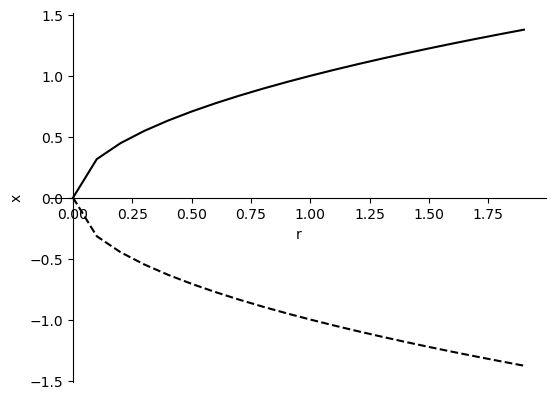

saddle node


In [5]:
r = symbols('r')
f1 = -sqrt(r)
f2 = sqrt(r)

rvals1 = np.arange(0, 2, 0.1)
f1lamb = lambdify(r, f1, 'numpy')
f2lamb = lambdify(r, f2, 'numpy')
x1vals = f1lamb(rvals1)
x2vals = f2lamb(rvals1)


plt.figure
plt.plot(rvals1, x2vals, color='black')
plt.figure
plt.plot(rvals1, x1vals, '--', color='black')
plt.xlabel('r')
plt.ylabel('x')
ax = plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()

print('saddle node')

### EXERCISE 2 

In [6]:
difx = r*x - x**2
dify = -y
fix_p = nonlinsolve([difx, dify], [x, y])
print(fix_p)


{(0, 0), (r, 0)}


for r<0
------- (-1, 0)  fixed point: --------
 Unstable Saddle Point
-1.0 0.0 4.0
eigenvalues [ 1. -1.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]
------- (0, 0)  fixed point: --------
star, degenerate node stable
1.0 -2.0 0.0
eigenvalues [-1. -1.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]


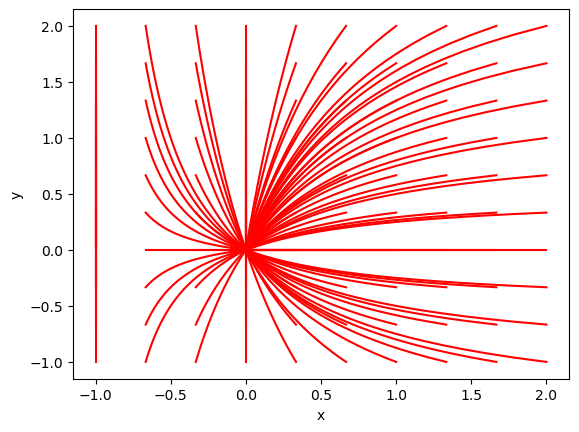

In [7]:
print('for r<0')
r1 = -1
r = symbols('r')
fix_p1 = fix_p.subs({r: r1})
difx1 = diff(difx, x, 1).subs({r: r1})
difx2 = diff(difx, y, 1).subs({r: r1})
dify1 = diff(dify, x, 1).subs({r: r1})
dify2 = diff(dify, y, 1).subs({r: r1})
a = Matrix([[difx1, difx2], [dify1, dify2]])

for e in fix_p1:
    list(e)
    if e[0].is_real and e[1].is_real:
        values_a = []
        print('-------', e, ' fixed point: --------')
        a_new = a.subs({x: e[0], y: e[1]})

        for i in a_new:
            values_a.append(i)

        e, b, c, d = values_a[0], values_a[1], values_a[2], values_a[3]
        J = np.matrix([[e,b],[c,d]]).astype('float64')
        dJ = np.linalg.det(J)
        tJ = np.trace(J)
        k = tJ**2 - 4*dJ
        epsFIX = 1e-6

        if dJ < -epsFIX:
            print(' Unstable Saddle Point')
        elif np.abs(dJ) < epsFIX:
            print('Multiple fixed points')
            if tJ > epsFIX:
                stb = 'unstable'
            elif tJ < -epsFIX:
                stb = 'stable'
            else:
                print('The whole plane is a fixed point')
        else:
            if np.abs(tJ) < epsFIX:
                print('Center')

            else:
                if tJ > epsFIX:
                    stb = 'unstable'
                else:
                    stb = 'stable'
                if k < -epsFIX:
                    print('spiral ' + stb)
                elif np.abs(k) < epsFIX:
                    print('star, degenerate node ' + stb)
                else:
                    print('Node ' + stb)
        print(dJ, tJ, k)
        w, v =  np.linalg.eig(J)
        print('eigenvalues', w)
        if (w[0].real and w[1].real) != 0:
            print('hyperbolic node')
        else:
            print('non-hyperbolic node')
        print('eigenvectors', v)
    else:
        print('No real fixed points')


def model(X, t):
    return np.array([-X[0] - X[0]**2,
                    - X[1]])

ts = np.linspace(0, 4, 100)
ic = np.linspace(-1, 2, 10)

for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-')


plt.ylabel('y')
plt.xlabel('x')
plt.show()

for r = 0
------- (0, 0)  fixed point: --------
Multiple fixed points
0.0 -1.0 1.0
eigenvalues [ 0. -1.]
non-hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]


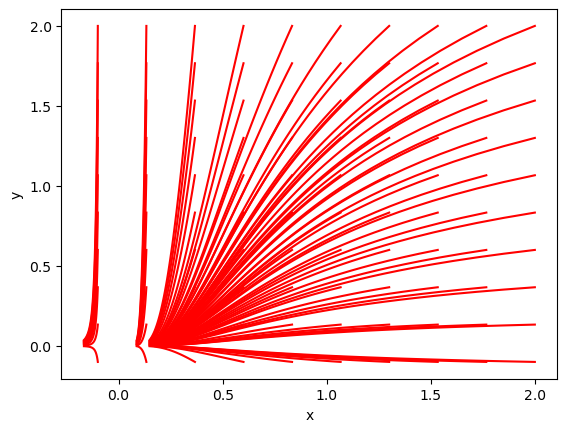

In [8]:
print('for r = 0')
r = symbols('r')
difx1 = diff(difx, x, 1).subs({r: 0})
difx2 = diff(difx, y, 1).subs({r: 0})
dify1 = diff(dify, x, 1).subs({r: 0})
dify2 = diff(dify, y, 1).subs({r: 0})
a = Matrix([[difx1, difx2], [dify1, dify2]])

fix_p2 = {(0,0)}
for e in fix_p2:
    values_a = []
    print('-------', e, ' fixed point: --------')
    a_new = a.subs({x: e[0], y: e[1]})

    for i in a_new:
        values_a.append(i)

    e, b, c, d = values_a[0], values_a[1], values_a[2], values_a[3]
    J = np.matrix([[e,b],[c,d]]).astype('float64')
    dJ = np.linalg.det(J)
    tJ = np.trace(J)
    k = tJ**2 - 4*dJ
    epsFIX = 1e-6

    if dJ < -epsFIX:
        print(' Unstable Saddle Point')
    elif np.abs(dJ) < epsFIX:
        print('Multiple fixed points')
        if tJ > epsFIX:
            stb = 'unstable'
        elif tJ < -epsFIX:
            stb = 'stable'
        else:
            print('The whole plane is a fixed point')
    else:
        if np.abs(tJ) < epsFIX:
            print('Center')

        else:
            if tJ > epsFIX:
                stb = 'unstable'
            else:
                stb = 'stable'
            if k < -epsFIX:
                print('spiral ' + stb)
            elif np.abs(k) < epsFIX:
                print('star, degenerate node ' + stb)
            else:
                print('Node ' + stb)
    print(dJ, tJ, k)
    w, v =  np.linalg.eig(J)
    print('eigenvalues', w)
    if (w[0].real and w[1].real) != 0:
        print('hyperbolic node')
    else:
        print('non-hyperbolic node')
    print('eigenvectors', v)

def model(X, t):
    return np.array([- X[0]**2,
                    - X[1]])

ts = np.linspace(0, 4, 100)
ic = np.linspace(-0.1, 2, 10)

for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-')


plt.ylabel('y')
plt.xlabel('x')
plt.show()


for r<0
------- (0, 0)  fixed point: --------
 Unstable Saddle Point
-1.0 0.0 4.0
eigenvalues [ 1. -1.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]
------- (1, 0)  fixed point: --------
star, degenerate node stable
1.0 -2.0 0.0
eigenvalues [-1. -1.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]


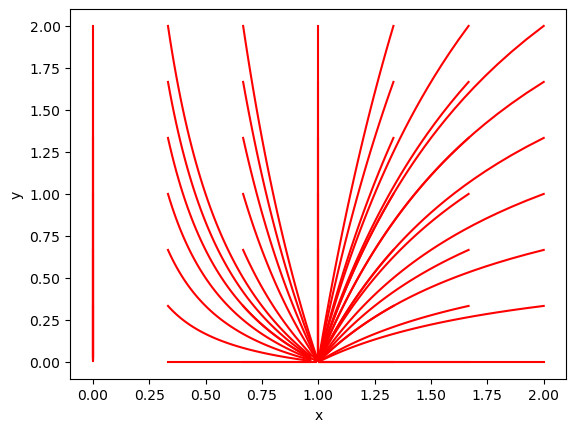

In [9]:
print('for r<0')
r3 = 1
r = symbols('r')
fix_p3 = fix_p.subs({r: r3})
difx1 = diff(difx, x, 1).subs({r: r3})
difx2 = diff(difx, y, 1).subs({r: r3})
dify1 = diff(dify, x, 1).subs({r: r3})
dify2 = diff(dify, y, 1).subs({r: r3})
a = Matrix([[difx1, difx2], [dify1, dify2]])

for e in fix_p3:
    list(e)
    if e[0].is_real and e[1].is_real:
        values_a = []
        print('-------', e, ' fixed point: --------')
        a_new = a.subs({x: e[0], y: e[1]})

        for i in a_new:
            values_a.append(i)

        e, b, c, d = values_a[0], values_a[1], values_a[2], values_a[3]
        J = np.matrix([[e,b],[c,d]]).astype('float64')
        dJ = np.linalg.det(J)
        tJ = np.trace(J)
        k = tJ**2 - 4*dJ
        epsFIX = 1e-6

        if dJ < -epsFIX:
            print(' Unstable Saddle Point')
        elif np.abs(dJ) < epsFIX:
            print('Multiple fixed points')
            if tJ > epsFIX:
                stb = 'unstable'
            elif tJ < -epsFIX:
                stb = 'stable'
            else:
                print('The whole plane is a fixed point')
        else:
            if np.abs(tJ) < epsFIX:
                print('Center')

            else:
                if tJ > epsFIX:
                    stb = 'unstable'
                else:
                    stb = 'stable'
                if k < -epsFIX:
                    print('spiral ' + stb)
                elif np.abs(k) < epsFIX:
                    print('star, degenerate node ' + stb)
                else:
                    print('Node ' + stb)
        print(dJ, tJ, k)
        w, v =  np.linalg.eig(J)
        print('eigenvalues', w)
        if (w[0].real and w[1].real) != 0:
            print('hyperbolic node')
        else:
            print('non-hyperbolic node')
        print('eigenvectors', v)
    else:
        print('No real fixed points')



def model(X, t):
    return np.array([X[0] - X[0]**2,
                    - X[1]])

ts = np.linspace(0, 4, 100)
ic = np.linspace(0, 2, 7)

for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-')


plt.ylabel('y')
plt.xlabel('x')
plt.show()


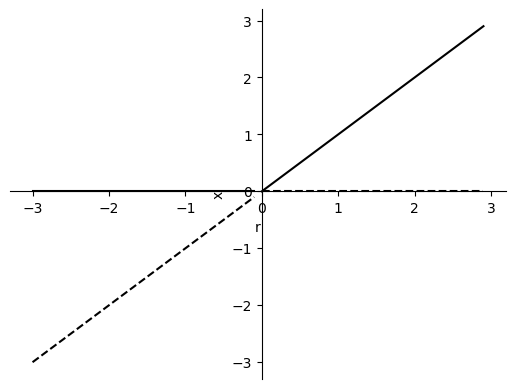

transcritical bifurcation


In [10]:
r = symbols('r')
f1 = r

rvals1 = np.arange(-3, 0, 0.1)
f1lamb = lambdify(r, f1, 'numpy')
x1vals = f1lamb(rvals1)
rvals2 = np.arange(0, 3, 0.1)
x2vals = f1lamb(rvals2)

plt.figure
plt.plot(rvals1, np.zeros(len(rvals1)), color='black')
plt.figure
plt.plot(rvals1, x1vals, '--', color='black')
plt.figure
plt.plot(rvals2, np.zeros(len(rvals2)),'--', color='black')
plt.figure
plt.plot(rvals2, x2vals, color='black')
plt.xlabel('r')
plt.ylabel('x')
ax = plt.gca() 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()

print('transcritical bifurcation')

### EXERCISE 3 

In [11]:

difx = r*x - x**3
dify = -y
fix_p = nonlinsolve([difx, dify], [x, y])


print('three fps for possitive r, one elsewhere')
fix_p

three fps for possitive r, one elsewhere


{(0, 0), (-sqrt(r), 0), (sqrt(r), 0)}

fixed points and phase portrait for r=<0, e.g. r = -1
------- (0, 0)  fixed point: --------
star, degenerate node stable
1.0 -2.0 0.0
eigenvalues [-1. -1.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]
No other real fixed points
No other real fixed points


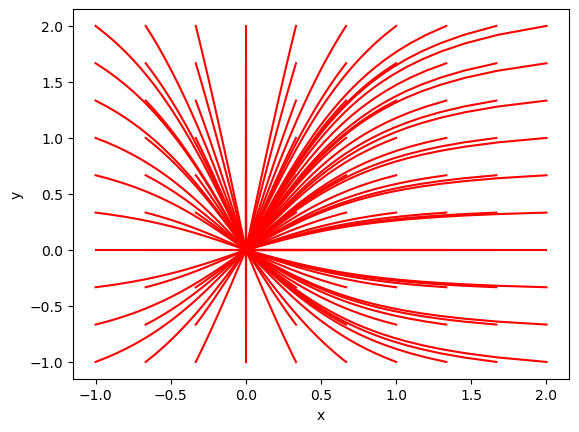

In [12]:
print('fixed points and phase portrait for r=<0, e.g. r = -1')
r1 = -1
r = symbols('r')
fix_p1 = fix_p.subs({r: r1})
difx1 = diff(difx, x, 1).subs({r: r1})
difx2 = diff(difx, y, 1).subs({r: r1})
dify1 = diff(dify, x, 1).subs({r: r1})
dify2 = diff(dify, y, 1).subs({r: r1})
a = Matrix([[difx1, difx2], [dify1, dify2]])

for e in fix_p1:
    list(e)
    if e[0].is_real and e[1].is_real:
        values_a = []
        print('-------', e, ' fixed point: --------')
        a_new = a.subs({x: e[0], y: e[1]})

        for i in a_new:
            values_a.append(i)

        e, b, c, d = values_a[0], values_a[1], values_a[2], values_a[3]
        J = np.matrix([[e,b],[c,d]]).astype('float64')
        dJ = np.linalg.det(J)
        tJ = np.trace(J)
        k = tJ**2 - 4*dJ
        epsFIX = 1e-6

        if dJ < -epsFIX:
            print(' Unstable Saddle Point')
        elif np.abs(dJ) < epsFIX:
            print('Multiple fixed points')
            if tJ > epsFIX:
                stb = 'unstable'
            elif tJ < -epsFIX:
                stb = 'stable'
            else:
                print('The whole plane is a fixed point')
        else:
            if np.abs(tJ) < epsFIX:
                print('Center')

            else:
                if tJ > epsFIX:
                    stb = 'unstable'
                else:
                    stb = 'stable'
                if k < -epsFIX:
                    print('spiral ' + stb)
                elif np.abs(k) < epsFIX:
                    print('star, degenerate node ' + stb)
                else:
                    print('Node ' + stb)
        print(dJ, tJ, k)
        w, v =  np.linalg.eig(J)
        print('eigenvalues', w)
        if (w[0].real and w[1].real) != 0:
            print('hyperbolic node')
        else:
            print('non-hyperbolic node')
        print('eigenvectors', v)
    else:
        print('No other real fixed points')


def model(X, t):
    return np.array([-X[0] - X[0]**3,
                    - X[1]])

ts = np.linspace(0, 4, 100)
ic = np.linspace(-1, 2, 10)

for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-')


plt.ylabel('y')
plt.xlabel('x')
plt.show()


for r>0
------- (-1, 0)  fixed point: --------
Node stable
2.0 -3.0 1.0
eigenvalues [-2. -1.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]
------- (0, 0)  fixed point: --------
 Unstable Saddle Point
-1.0 0.0 4.0
eigenvalues [ 1. -1.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]
------- (1, 0)  fixed point: --------
Node stable
2.0 -3.0 1.0
eigenvalues [-2. -1.]
hyperbolic node
eigenvectors [[1. 0.]
 [0. 1.]]


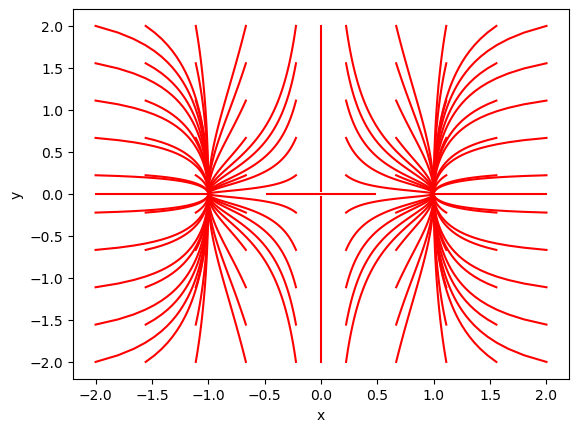

In [13]:
print('for r>0')
r2 = 1
r = symbols('r')
fix_p2 = fix_p.subs({r: r2})
difx1 = diff(difx, x, 1).subs({r: r2})
difx2 = diff(difx, y, 1).subs({r: r2})
dify1 = diff(dify, x, 1).subs({r: r2})
dify2 = diff(dify, y, 1).subs({r: r2})
a = Matrix([[difx1, difx2], [dify1, dify2]])

for e in fix_p2:
    list(e)
    if e[0].is_real and e[1].is_real:
        values_a = []
        print('-------', e, ' fixed point: --------')
        a_new = a.subs({x: e[0], y: e[1]})

        for i in a_new:
            values_a.append(i)

        e, b, c, d = values_a[0], values_a[1], values_a[2], values_a[3]
        J = np.matrix([[e,b],[c,d]]).astype('float64')
        dJ = np.linalg.det(J)
        tJ = np.trace(J)
        k = tJ**2 - 4*dJ
        epsFIX = 1e-6

        if dJ < -epsFIX:
            print(' Unstable Saddle Point')
        elif np.abs(dJ) < epsFIX:
            print('Multiple fixed points')
            if tJ > epsFIX:
                stb = 'unstable'
            elif tJ < -epsFIX:
                stb = 'stable'
            else:
                print('The whole plane is a fixed point')
        else:
            if np.abs(tJ) < epsFIX:
                print('Center')

            else:
                if tJ > epsFIX:
                    stb = 'unstable'
                else:
                    stb = 'stable'
                if k < -epsFIX:
                    print('spiral ' + stb)
                elif np.abs(k) < epsFIX:
                    print('star, degenerate node ' + stb)
                else:
                    print('Node ' + stb)
        print(dJ, tJ, k)
        w, v =  np.linalg.eig(J)
        print('eigenvalues', w)
        if (w[0].real and w[1].real) != 0:
            print('hyperbolic node')
        else:
            print('non-hyperbolic node')
        print('eigenvectors', v)
    else:
        print('No other real fixed points')


def model(X, t):
    return np.array([X[0] - X[0]**3,
                    - X[1]])

ts = np.linspace(0, 4, 100)
ic = np.linspace(-2, 2, 10)

for r in ic: 
    for s in ic:
        x0 = [r, s]
        xs = odeint(model, x0, ts)
        plt.plot(xs[:, 0], xs[:, 1], 'r-')

ic_manual = [[0, 2], [0, -2], [-0.01, 0], [0.01, 0], [-2, 0], [2, 0]]
for e in ic_manual:
    xt = odeint(model, e, ts)
    plt.plot(xt[:,0], xt[:,1], 'red')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

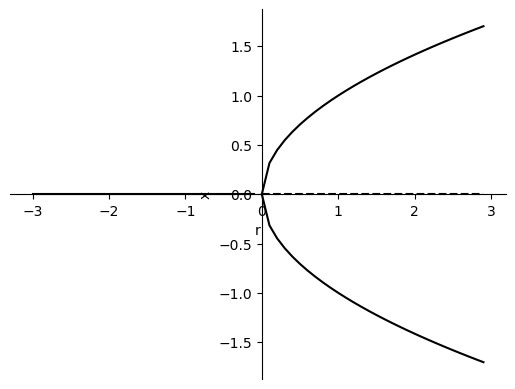

supercritical bifurcation


In [14]:

r = symbols('r')
f1 = -sqrt(r)
f2 = sqrt(r)

rvals1 = np.arange(-3, 0, 0.1)
rvals2 = np.arange(0, 3, 0.1)
f1lamb = lambdify(r, f1, 'numpy')
f2lamb = lambdify(r, f2, 'numpy')
x1vals = f1lamb(rvals2)
rvals2 = np.arange(0, 3, 0.1)
x2vals = f2lamb(rvals2)

plt.figure
plt.plot(rvals1, np.zeros(len(rvals1)), color='black')
plt.figure
plt.plot(rvals2, x1vals, color='black')
plt.figure
plt.plot(rvals2, np.zeros(len(rvals2)),'--', color='black')
plt.figure
plt.plot(rvals2, x2vals, color='black')
plt.xlabel('r')
plt.ylabel('x')
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()

print('supercritical bifurcation')